In [ ]:
import math

import numpy as np
import pandas as pd
import scipy.io as scio
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.cluster import AgglomerativeClustering

%load_ext autoreload
%autoreload 2
import main

In [110]:
mat = scio.loadmat('bird_small.mat')

a = np.array(mat['A'])
bird = pd.DataFrame(a.reshape(-1, 3), columns=['red', 'green', 'blue'])

In [72]:
K = 16
iterations = 5

progress = list(main.kmeans_multi(bird, K, iterations))
bird_clusters, bird_centroids = progress[-1]
cost = main.cost(bird, bird_clusters, bird_centroids)
print('Cost:', cost)

Cost: 468.00075831908487


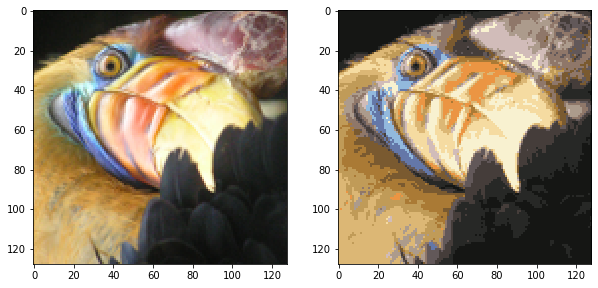

In [109]:
new_bird = bird_centroids.iloc[bird_clusters]
new_bird.reset_index(drop=True, inplace=True)
new_bird_arr = np.reshape(new_bird.values, a.shape).astype(int)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(121)
ax.imshow(np.rot90(a, k=1))
ax = fig.add_subplot(122)
ax.imshow(np.rot90(new_bird_arr, k=1))

plt.show()

In [137]:
factor = math.log(256**3, 2) / math.log(16, 2)
print('Images size reduced by a factor of {}'.format(factor))

Images size reduced by a factor of 6.0


In [96]:
img_arr = (mpimg.imread('picture.png') * 256).astype(int)
img_colors = pd.DataFrame(img_arr.reshape(-1, 3), columns=['red', 'green', 'blue'])

In [100]:
K = 16
iterations = 5

progress = list(main.kmeans_multi(img_colors, K, iterations))
clusters, centroids = progress[-1]
cost = main.cost(colors, clusters, centroids)
print('Cost:', cost)

Cost: 25244.391861383785


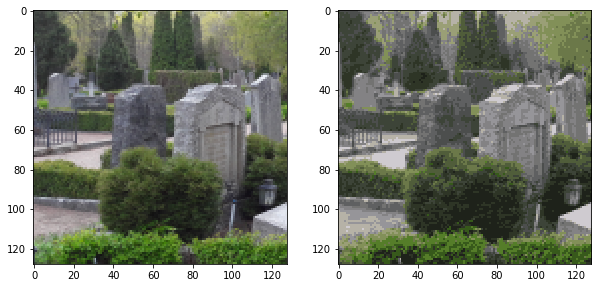

In [112]:
new_colors = centroids.iloc[clusters]
new_colors.reset_index(drop=True, inplace=True)
new_img = np.reshape(new_colors.values, img_arr.shape).astype(int)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(121)
ax.imshow(img_arr)
ax = fig.add_subplot(122)
ax.imshow(new_img)

plt.show()

In [135]:
clustering = AgglomerativeClustering(n_clusters=16)
aggl_clusters = pd.Series(clustering.fit_predict(img_colors))
aggl_centroids = main.move_centroids(img_colors, aggl_clusters)

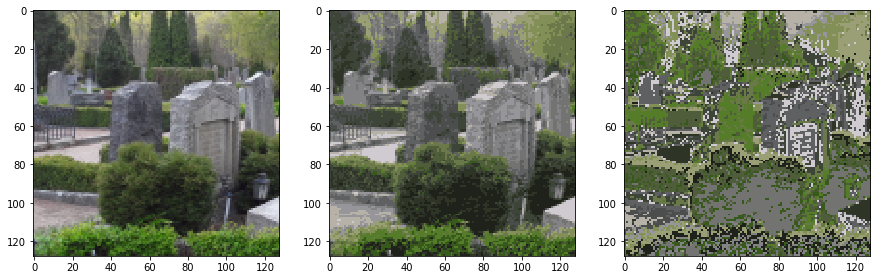

In [136]:
aggl_colors = centroids.iloc[aggl_clusters]
aggl_colors.reset_index(drop=True, inplace=True)
aggl_img = np.reshape(aggl_colors.values, img_arr.shape).astype(int)

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(131)
ax.imshow(img_arr)
ax = fig.add_subplot(132)
ax.imshow(new_img)
ax = fig.add_subplot(133)
ax.imshow(aggl_img)

plt.show()